# <font color = Crimson size = 6> <b>Обобщенные линейные модели (GLM)</b> </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

**Условия применения линейной регрессии**

1. Наличие линейной зависимости между зависимой и независимой переменной.

2. Нормальное распределение остатков.

3. Гомоскедастичность. Однородность дисперсии остатков на всех уровнях независимой переменной.

4. Нормальное распределение переменных (желательно).

<img src="./img/st_15_image1.jpg" alt="st_15_image1" width="750"/>

**GLM используют, когда нарушаются условия применения линейной регрессии.**

***
## <font color = DarkGreen size = 5> <b>Общая (упрощенная) формула</b> </font>

<img src="./img/st_15_image2.png" alt="st_15_image2" width=""/>

**Функция связи (Link Function)** преобразует распределение зависимой переменной так, что:
- оно принимает значения от $-\infty$ до $+\infty$ <br>
В подовляющем большинстве случаев, когда мы используем GLM, наше распределение не принимает значения из какого-то диапазона (чаще всего, когда неотрицательные значения). Т.к. коэффициенты могут быть как положительные, так и отрицательные, то линия регрессии может бесконечно двигаться в любом направлении. В том числе потенциальная регрессионная модель может предсказывать отрицательные значения для переменной, которая отрицательной быть не может никогда. И это проблематично, потому что дает нам неинтерпретируемые результаты, особенно если мы занимаемся предиктивной аналитикой. <br><br>
- связь зависимой пременной с предикторами линейна <br><br>


| Трансформация | Уравнение регрессии | Оценочное значение $\hat{y}$ | Описание |
| ----: | :-------: | :-------: | :--------- |
| Identity $y$ |  $y = b_0 + b_1 x$  | $\hat{y} = b_0 + b_1 x$ | Без преобразования ("функция связи" обычной линейной регрессии) |
| Логарифмирование <br> $\log{y}$ | $\log{y} = b_0 + b_1 x$ | $\hat{y} = 10^{b_0 + b_1 x}$ | Данные не должны быть отрицательными или нулевыми. <br> Компенсирует правостороннюю асимметрию. |
| Обратная функция $\cfrac{1}{y}$ | $\cfrac{1}{y} = b_0 + b_1 x$ | $\hat{y} = \cfrac{1}{b_0 + b_1 x}$ | Данные могут быть отрицательными, но не нулевыми. <br> Меняет асимметрию на противоположную. |
| Квадратный корень $\sqrt{y}$ | $\sqrt{y} = b_0 + b_1 x$ | $\hat{y} = (b_0 + b_1 x)^2$ | Только положительные данные. <br> Компенсирует правостороннюю асимметрию. |
| $\log{x}$ | $y = b_0 + b_1 \log{x}$ | $\hat{y} = b_0 + b_1 \log{x}$ |  |
| $\log{\log{x}}$ и $\log{y}$ | $\log{y} = b_0 + b_1 \log{x}$ | $\hat{y} = 10^{b_0 + b_1 \log{x}}$ |  |

***
## <font color = DarkGreen size = 5> <b>Биномиальная регрессия (Binomial)</b> </font>

**Номинативные данные с 2мя категориями (распределение Бернулли)**:
- Нет градаций, данные дискретны
- За их пределами нет вообще ничего
- Работают не с самими значениями данных, а с их вероятностью

Функция массы вероятности (pmf):

$P(X=k) = 
   \begin{cases}
       p   & \quad \text{if } x=1 \\
       1-p & \quad \text{if } x=0
   \end{cases}
$, где $0 < p < 1$.


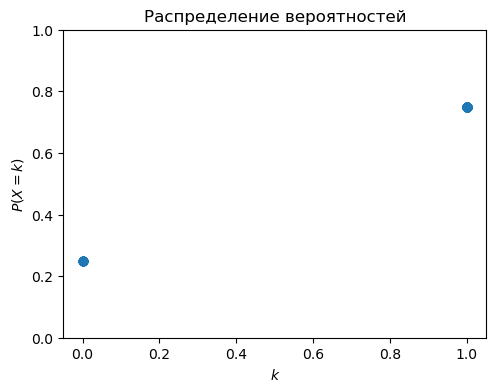

In [2]:
p = 0.75
rv = stats.bernoulli(p)
x = stats.bernoulli.rvs(p, size=100)

plt.figure(figsize = [6*2, 4])
plt.subplot(1, 2, 1)
plt.scatter(x, rv.pmf(x))
plt.ylim(0,1)
plt.ylabel('$P(X=k)$')
plt.xlabel('$k$')
plt.title('Распределение вероятностей');

***
### <font color = MediumBlue size = 4> <b>Логистическая регрессия (Logistic)</b> </font>

| Распределение | Разброс значений<br>зависимой переменной | Параметры | Функция связи |
| -----: | :-----: | :----- | :-----: |
| Бернулли<br>(биномиальное с $n=1$) | $[0;1]$ | $p$ - вероятность успеха<br>$n$ - количество попыток | Логит |

<br><br>

<table>
    <caption><b>Как считать логит</b></caption>
    <head>
        <tr align=center>
            <th width=25%><b>Элемент формулы</b></th>
            <th><b>Интерпретация</b></th>
            <th><b>Границы</b></th>
        </tr>
    </head>
    <tbody>
        <tr>
            <td>$p$</td>
            <td>вероятность успеха</td>
            <td>$[0;1]$</td>
        </tr>
        <tr>
            <td>$\cfrac{p}{1-p}$</td>
            <td>шансы успеха</td>
            <td>$[0;\infty)$</td>
        </tr>
        <tr>
            <td>$\ln\left(\cfrac{p}{1-p}\right)$</td>
            <td>логит</td>
            <td>$(-\infty;\infty)$</td>
        </tr>
    </tbody>
</table>

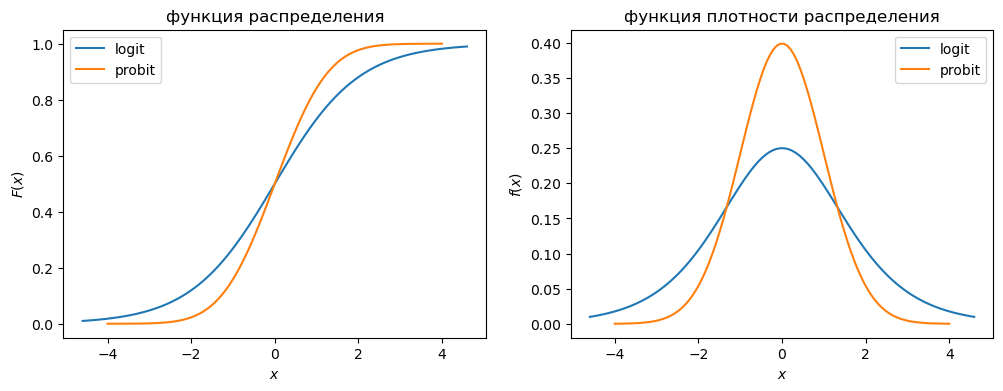

In [3]:
plt.figure(figsize = [6*2, 4])

X = np.linspace(stats.logistic.ppf(0.01), stats.logistic.ppf(0.99), 100)
rv = stats.logistic()

Mx, sigma =0, 1
rvn = stats.norm(loc=Mx, scale=sigma)
Xn = np.linspace(-4, 4, 100)

plt.subplot(1, 2, 1)
plt.plot(X, rv.cdf(X), label='logit')
plt.plot(Xn, rvn.cdf(Xn), label='probit')
plt.legend()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.title('функция распределения')

plt.subplot(1, 2, 2)
plt.plot(X, rv.pdf(X), label='logit')
plt.plot(Xn, rvn.pdf(Xn), label='probit')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('функция плотности распределения');

Логистическое распределение, в которое мы трансформировали наши вероятности, похоже на нормальное.

**Линейная регрессия** бесконечно растет в любую сторону и выходит за пределы $[0;1]$. <br>
**Логистическая регрессия** не выходит за пределы $[0;1]$, в результате полычаем осознанные коэффициенты регрессионного уравнения и предсказания.

<img src="./img/st_15_image3.jpg" alt="st_15_image3" width=""/>


##### <font color = SlateBlue size = 3> Пример </font>

In [4]:
df = pd.read_csv('./data/titanik_full_data.csv', sep='\t')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Из всего этого набора мы возьмём четыре столбца:
- **Survived** - выжил пассажир или нет
- **Sex** - пол пассажира
- **Age** - возраст пассажира
- **Pclass** - класс, в котором плыл пассажир (1, 2 или 3)

Посмотрим на распределение выживших/погибших.

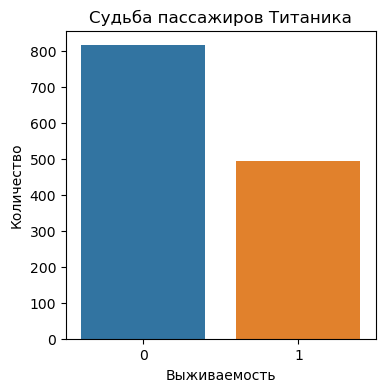

In [5]:
plt.figure(figsize=(4, 4))
sns.countplot(x = 'Survived', data = df)
plt.xlabel('Выживаемость')
plt.ylabel('Количество')
plt.title('Судьба пассажиров Титаника');

Применим логистическую регрессию. С помощью **`С()`** мы указываем категориальные переменные в формуле.

In [6]:
logit = smf.glm('Survived ~ C(Pclass) + C(Sex) + Age', data=df, family = sm.families.Binomial()).fit()
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1046
Model:                            GLM   Df Residuals:                     1041
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.21
Date:                Mon, 19 Feb 2024   Deviance:                       796.42
Time:                        14:57:49   Pearson chi2:                 1.10e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4421
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9568      0.372     10.641      0.000       3.228       4.686
C(Pclass)[T.2]    -1.2370      0.256     -4.833      0.000      -1.739      -0.735
C(Pclass)[T.3]    -2.2390      0.256     -8.759      0.000      -2.740      -1.738
C(Sex)[T.male]    -3.5601      0.196    -18.158      0.000      -3.944      -3.176
Age               -0.0313      0.007     -4.407      0.000      -0.045      -0.017
==================================================================================
"""

`Intercept` - шансы выжить (логарифмические) для женщины в первом классе, которой 0 лет. 

- Все коэффициенты значимы (`P>|z|` меньше 0.05)
- Шансы выжить во втором классе ниже, чем в первом, а в третьем ещё ниже
- Быть мужчиной на Титанике ещё хуже
- А также плохо быть старше на Титанике

***
### <font color = MediumBlue size = 4> <b>Пробит-регрессия (Probit)</b> </font>

- Способ перевести вероятность в нормированное нормальное распределение ($a = 0$ и $\sigma = 1$)
- Используется обратная функция кумулятивного стандартного нормального распределения

***
## <font color = DarkGreen size = 5> <b>Мультиномиальная регрессия (Multinomial)</b> </font>

**Номинальные данные с 3мя категориями и больше:**
- Нет градаций, данные дискретны
- За их пределами нет вообще ничего
- Работают не с самими значениями данных, а с их вероятностью
- Вероятность нужно рассчитать для каждой категории отдельно

| Распределение | Разброс значений<br>зависимой переменной | Параметры | Функция связи |
| -----: | :-----: | :----- | :-----: |
| Мульномиальное | $[0;1]$ | $p_1 \dots p_k$ - вероятность каждого события<br>$n$ - количество попыток | Мультиномиальный логит |

##### <font color = SlateBlue size = 3> Пример </font>

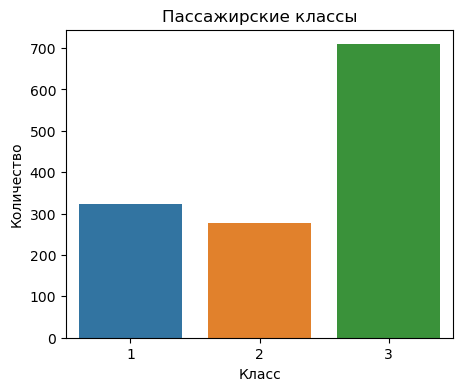

In [7]:
plt.figure(figsize=(5, 4))
sns.countplot(x = 'Pclass', data = df)
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.title('Пассажирские классы');

* Имя распределения - мультиномиальное
* Разброс значений - (1...$n$)
* Параметры - $p_1$...$p_n$ (вероятность каждого события), $n$ (количество попыток)
* Типичная функция связи - мультиномиальный логит

In [8]:
multi_res = smf.mnlogit('Pclass ~ C(Sex) + Age', df).fit()
multi_res.summary()

Optimization terminated successfully.
         Current function value: 0.944697
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 Pclass   No. Observations:                 1046
Model:                        MNLogit   Df Residuals:                     1040
Method:                           MLE   Df Model:                            4
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.1028
Time:                        14:57:57   Log-Likelihood:                -988.15
converged:                       True   LL-Null:                       -1101.4
Covariance Type:            nonrobust   LLR p-value:                 7.608e-48
==================================================================================
      Pclass=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4181      0.253      5.611      0.000       0.923       1.913
C(Sex)[T.male]     0.4934      0.183      2.691      0.007       0.134       0.853
Age               -0.0522      0.007     -7.728      0.000      -0.065      -0.039
----------------------------------------------------------------------------------
      Pclass=3       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6021      0.239     10.900      0.000       2.134       3.070
C(Sex)[T.male]     1.0119      0.174      5.824      0.000       0.671       1.352
Age               -0.0843      0.007    -12.514      0.000      -0.098      -0.071
==================================================================================
"""

Результат интерпретируем относительно первого класса:
- Мужчин больше во втором, а в третьем ещё больше
- Судя по тому, что интерцепт тоже больше (а в него входят женщины), женщин тоже больше => в других классах просто больше людей
- У возраста обратная зависимость

***
## <font color = DarkGreen size = 5> <b>Порядковая регресси (Ordinal)</b> </font>

**Порядковые данные**:
- Данные дискретны
- Есть порядок в категориях - какие-то категории больше или меньше других
- Не можем понять, на сколько больше или меньше
- Работают не с самими значениями данных, а с их вероятностью

**Что делать?**
- Избегайте собирать данные в порядковой шкале
- Если есть возможность - не анализируйте такие данные
- Если приходится, но гипотезы простые - пользуйтесь ранговыми непараметрическими методами
- Иначе GLM

GLM допускает какое-то реально существующее непрерывное распределние произвольной формы, но из-за того, что мы измерили его в порядковой шкале оно оказалось разрезано на несколько кусков - порогов (thresholds).

<img src="./img/st_15_image4.jpg" alt="st_15_image4" width="400"/>

Пороги могут находиться как на одинаковом расстоянии друг от друга, так и на разном.

<img src="./img/st_15_image5.jpg" alt="st_15_image5" width="400"/>

В любом случае, пороги обозначают границы, которые разделяют данные между собой на разные категории.

Порядковая регрессия похожа на логистическую с поправкой на такую ситуацию. Т.е. нам мужно оченить с какой верояностью мы перейдем от более низкой категории к более высокой, что пересечем очередной порог.

| Распределение | Разброс значений<br>зависимой переменной | Параметры | Функция связи |
| -----: | :-----: | :----- | :-----: |
| Кумулятивное пороговое | $[0;1]$ | $p_1 \dots p_k$ - вероятность каждой категории | Порядковый логит |


##### <font color = SlateBlue size = 3> Пример </font>

* Имя распределения - кумулятивное пороговое
* Разброс значений - (1...$n$)
* Параметры - $p_1$...$p_n$ (вероятность каждого события)
* Типичная функция связи - порядковый логит

Качаем пакет `bevel` - его нет на `pip`, нужно ставить с [Гитхаба](https://github.com/Shopify/bevel). Про то, как устанавливать пакеты с Гитхаба, читайте [пост на StackOverflow](https://stackoverflow.com/questions/15268953/how-to-install-python-package-from-github).

In [ ]:
#from bevel.linear_ordinal_regression import OrderedLogit

В следующем датасете оценивали качество красных вин с разными химическими характеристиками.

In [9]:
df = pd.read_csv('./data/winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Посмотрим на распределение рейтингов (переменная `quality`):

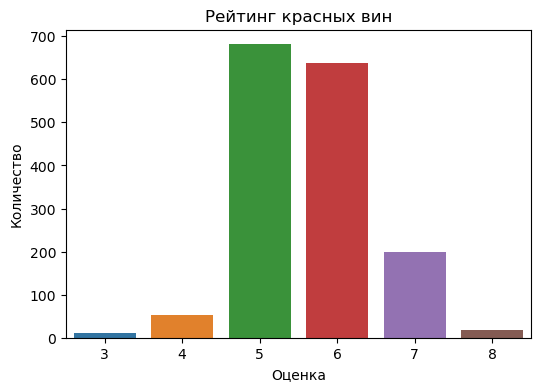

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x = 'quality', data = df)
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.title('Рейтинг красных вин');

In [11]:
Y = df.quality
X = df.drop('quality', axis = 1)

#ol = OrderedLogit()
#ol.fit(X, Y)

#ol.print_summary()

`Somers' D` - это как $R^2$, только для порядковых моделей и меняется от -1 до 1 (как корреляция). Чем он больше и положительнее - тем лучше.

Плохо на рейтинги влияют:
- летучая кислотность
- содержание хлоридов
- общее содержание диоксида серы

Хорошо влияет:
- свободный диоксид серы (тут значимость спорная)
- содержание сульфатов
- содержание алкоголя

Ещё есть более богатый на модели и документацию пакет `mord` (документация [вот тут](https://pythonhosted.org/mord/)), который можно скачать через `pip`. Но он настроен на построение предсказательных моделей и не даёт статистического вывода.

***
## <font color = DarkGreen size = 5> <b>Регрессия Пуассона (Poisson)</b> </font>

**Количественные данные (count data):**
- Данные дискретны
- Данные неотрицательные
- Чаще всего наблюдается правосторонняя ассиметрия

| Распределение | Разброс значений<br>зависимой переменной | Параметры | Функция связи |
| -----: | :-----: | :----- | :-----: |
| Пуассоновское | $[0; \infty)$ | $\lambda$ - темп (rate) | Логарифм |

**На среднее и дисперсию у распределения Пуассона один параметр $\lambda$**
- Если дисперсия в реальности меньше среднего - недодисперсия (underdispersion) - встречается редко
- Если дисперсия в реальности больше среднего - сверхдисперсия (overdispersion) - очень частый случай

##### <font color = SlateBlue size = 3> Пример </font>
Используем данные по владельцам кредитных карточек

In [12]:
df = pd.read_csv('./data/credit_card.csv')
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


Из этого всего возьмём переменные:

- `active` - количество активных счетов
- `age` - возраст
- `income` - годовой доход в десятках тысяч
- `expenditure` - месячный расход средств кредитной карты
- `owner` - владеет ли пользователь собственным домом или нет
- `selfemp` - самозанятый или нет

Посмотрим распределение количества активных счетов.

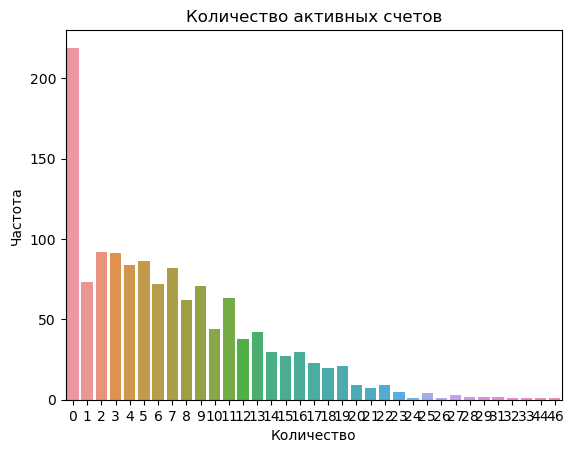

In [13]:
sns.countplot(x = 'active', data = df)
plt.xlabel('Количество')
plt.ylabel('Частота')
plt.title('Количество активных счетов');

In [14]:
pois = smf.glm('active ~ age + income + expenditure + C(owner) + C(selfemp)', \
               family = sm.families.Poisson(), data = df).fit()
pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1313
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5614.4
Date:                Mon, 19 Feb 2024   Deviance:                       7142.4
Time:                        14:59:16   Pearson chi2:                 6.89e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3903
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4000      0.037     37.440      0.000       1.327       1.473
C(owner)[T.yes]       0.4033      0.023     17.409      0.000       0.358       0.449
C(selfemp)[T.yes]     0.0141      0.040      0.355      0.723      -0.064       0.092
age                   0.0062      0.001      5.648      0.000       0.004       0.008
income                0.0361      0.006      5.752      0.000       0.024       0.048
expenditure        2.925e-05   3.75e-05      0.779      0.436   -4.43e-05       0.000
=====================================================================================
"""

Количество крединтых кард растёт в зависимости от: <br>
* дохода 
* возраста
* владения собственным домом

Чтобы проверить распределение на сверхдисперсию: $\cfrac{\text{показатель остатков}}{\text{степени свободы остатков}}$

In [15]:
# сверхдисперсия
pois.pearson_chi2/pois.df_resid

5.249939996924423

Для модели Пуассона это значение должно быть близко к 1. Дисперсия в 5 раз превышает среднее, что негативно влияет на предсказательную способность модели.

Нужно другое распределение, которое может компенсировать проблему.

***
## <font color = DarkGreen size = 5> <b>Отрицательно-биномиальная регрессия (Negative Binomial)</b> </font>

Применяется при сверхдисперсии. 

**Отрицательное биномиальное распределение** - комбинация из распределения Пуассона и гамма-распределения. \
Гамма по своим характеристикам очень похоже на распределение Пуассона, но оно не дискретно.

| Распределение | Разброс значений<br>зависимой переменной | Параметры | Функция связи |
| -----: | :-----: | :----- | :-----: |
| Отрицательное биномиальное | $[0; \infty)$ | $\mu$ - среднее<br>$\theta$ - форма / дисперсия | Логарифм |

Отрицательно-биномиальное распределение поддерживает гораздо больше "форм" и ситуаций, чем распредление Пуассона.
<img src="./img/st_15_image6.jpg" alt="st_15_image6" width=""/>

##### <font color = SlateBlue size = 3> Пример </font>
Используем данные по владельцам кредитных карточек

Когда строим модель, обращаем внимание на аргумент `alpha` - это параметр дисперсии. От него зависит сходимость результатов, поэтому в случае ошибок рекомендуется ставить его в диапазоне от 0.1 до 2.

In [16]:
neg = smf.glm('active ~ age + income + expenditure + C(owner) + C(selfemp)', data = df, \
              family = sm.families.NegativeBinomial(alpha=0.15)).fit()
neg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1313
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4429.3
Date:                Mon, 19 Feb 2024   Deviance:                       3940.9
Time:                        14:59:44   Pearson chi2:                 3.44e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2157
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.3690      0.054     25.206      0.000       1.263       1.475
C(owner)[T.yes]       0.3984      0.033     11.996      0.000       0.333       0.463
C(selfemp)[T.yes]     0.0055      0.059      0.094      0.925      -0.110       0.121
age                   0.0069      0.002      4.263      0.000       0.004       0.010
income                0.0393      0.010      4.099      0.000       0.021       0.058
expenditure        2.445e-05   5.63e-05      0.434      0.664   -8.59e-05       0.000
=====================================================================================
"""

Количество крединтых кард растёт в зависимости от:

* дохода 
* возраста
* владения собственным домом

Интерпретация результатов очень похожа.

In [17]:
# сверхдисперсия
neg.pearson_chi2/neg.df_resid

2.619678072486944

Сравним модели с помощью информационного критерия Акаике (AIC):

- Его абсолютное значение ничего не значит, полезен только для сравнения моделей
- Чем он ниже, тем лучше модель

> Мы можем сравнить два разных типа моделей через AIC (при условии, что ЗП и НП одинаковые).

In [18]:
print(pois.aic)
print(neg.aic)

11240.817775454603
8870.632884339047


Предиктивная способность негативно-биномиальной модели лучше.

***
## <font color = DarkGreen size = 5> <b>Регрессия с повышенным количеством нулей (zero-inflated)</b> </font>

**Если в распределении наблюдается выброс нулей, тогда предполагаем, что у нас есть два процесса:**

1. Основной (Пуассоновский или отрицательно-биномиальный)
2. Дополнительны (генерирующий лишние нули)

| Распределение | Разброс значений<br>зависимой переменной | Параметры | Функция связи |
| -----: | :-----: | :----- | :-----: |
| Пуассоновское | $[0; \infty)$ | $\lambda$ - темп (rate)<br>$\pi$ - вероятность принадлежности нуля одному из двух процессов | Логарифм |
| Отрицательное биномиальное | $[0; \infty)$ | $\mu$ - среднее<br>$\theta$ - форма / дисперсия<br>$\pi$ - вероятность принадлежности нуля одному из двух процессов | Логарифм |

##### <font color = SlateBlue size = 3> Пример </font>
Используем данные по владельцам кредитных карточек

In [19]:
# перекодируем категориальные данные: yes, no = 1, 0
df.owner = np.where(df.owner == 'yes', 1, 0)
df.selfemp = np.where(df.selfemp == 'yes', 1, 0)

Y = df.active
X = df.loc[:, ['owner', 'selfemp', 'age', 'income', 'expenditure']]
X = sm.add_constant(X) # добавляем константу, чтобы в модели был intercept

In [20]:
zeroinf = sm.ZeroInflatedPoisson(Y, X).fit(maxiter = 100, method = 'ncg')
zeroinf.summary()

Optimization terminated successfully.
         Current function value: 3.899929
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
         Hessian evaluations: 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                  active   No. Observations:                 1319
Model:             ZeroInflatedPoisson   Df Residuals:                     1313
Method:                            MLE   Df Model:                            5
Date:                 Mon, 19 Feb 2024   Pseudo R-squ.:                -0.05893
Time:                         15:00:20   Log-Likelihood:                -5144.0
converged:                        True   LL-Null:                       -4857.8
Covariance Type:             nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const     0.0999      0.055      1.812      0.070      -0.008       0.208
const             1.7967      0.037     48.172      0.000       1.724       1.870
owner             0.0017      0.023      0.073      0.942      -0.043       0.046
selfemp           0.0008      0.039      0.022      0.983      -0.075       0.077
age               0.0093      0.001      8.656      0.000       0.007       0.011
income            0.0019      0.007      0.280      0.779      -0.011       0.015
expenditure       0.0001   3.81e-05      2.691      0.007    2.79e-05       0.000
=================================================================================
"""

Появился коэффициент `inflate` - это коэффициент, отвечающий за компенсацию лишних нулей.

Изменилась интерпретация. Количество крединтых кард растёт в зависимости от:

* возраста
* расходов

In [21]:
print(pois.aic)
print(neg.aic)
print(zeroinf.aic)

11240.817775454603
8870.632884339047
10300.01303290444


Построим ZeroInflated на основе отрицательно-биномиального распределения.

In [22]:
zeroinf2 = sm.ZeroInflatedNegativeBinomialP(Y, X).fit(maxiter = 100, method = 'ncg')
zeroinf2.summary()

Optimization terminated successfully.
         Current function value: 3.055914
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
         Hessian evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedNegativeBinomialP Regression Results                    
=========================================================================================
Dep. Variable:                            active   No. Observations:                 1319
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     1313
Method:                                      MLE   Df Model:                            5
Date:                           Mon, 19 Feb 2024   Pseudo R-squ.:                -0.03018
Time:                                   15:00:41   Log-Likelihood:                -4030.7
converged:                                  True   LL-Null:                       -3912.7
Covariance Type:                       nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const    -0.5152      0.058     -8.820      0.000      -0.630      -0.401
const             1.4543      0.087     16.765      0.000       1.284       1.624
owner             0.3590      0.050      7.112      0.000       0.260       0.458
selfemp           0.0029      0.090      0.032      0.974      -0.173       0.178
age               0.0097      0.003      3.757      0.000       0.005       0.015
income            0.0352      0.016      2.234      0.026       0.004       0.066
expenditure    5.109e-05   9.08e-05      0.563      0.573      -0.000       0.000
alpha             0.4517      0.032     14.330      0.000       0.390       0.514
=================================================================================
"""

Здесь интерпретация результатов похожа на изначальную.

Ещё есть параметр `alpha`, который оценивает избыток дисперсии.

In [23]:
print(pois.aic)
print(neg.aic)
print(zeroinf.aic)
print(zeroinf2.aic)

11240.817775454603
8870.632884339047
10300.01303290444
8073.499950321415


Zero-inflated лучше своих обычных вариантов в данной ситуации.

***
## <font color = DarkGreen size = 5> <b>Регрессия выживаемости (survival)</b> </font>


Отток клиентов: у нас есть не только события (бинарная переменная), но и время до них.
Но мы не можем определить время до события у тех, у кого оно не произошло.
Но исключить их из модели мы тоже не можем.

<img src="./img/st_15_image8.jpg" alt="st_15_image8" width="500"/>

Часть данных, для которой событие не произошло, называют цензурированной.
Она также влияет на показатели итоговой модели.

<img src="./img/st_15_image7.jpg" alt="st_15_image7" width="600"/>

***
### <font color = MediumBlue size = 4> <b>Модель ускорения времени неудач (Accelerated Failure Time Model, AFT) </b> </font>

* Имя распределения - Вейбулла (как пример)
* Разброс значений - (0;$\infty$)
* Параметры - $\alpha$ (дисперсия), $\gamma$ (форма)
* Типичная функция связи - логарифм

<img src="./img/st_15_image9.jpg" alt="st_15_image9" width="500"/>


In [ ]:
#import lifelines as lf

In [27]:
churn = pd.read_csv('./data/Telco-Customer-Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- **Churn** - ушёл клиент или нет
- **tenure** - сколько месяцев пробыл с компанией
- **SeniorCitizen** - клиент пожилой или нет
- **Dependents** - есть иждивенцы в семье или нет
- **MonthlyCharges** - сколько клиент платит в месяц
- **PaperlessBilling** - оплата с чеком или бесчековая

Распределение оттока:

Text(0.5, 1.0, 'Судьба клиентов компании')

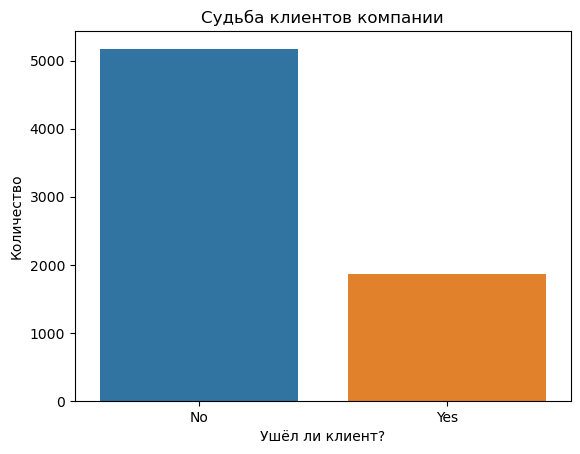

In [28]:
sns.countplot(x = 'Churn', data = churn)
plt.xlabel('Ушёл ли клиент?')
plt.ylabel('Количество')
plt.title('Судьба клиентов компании')

Распределение, сколько люди месяцев проводят с компанией:

Text(0.5, 1.0, 'Сколько времени клиенты провели с компанией')

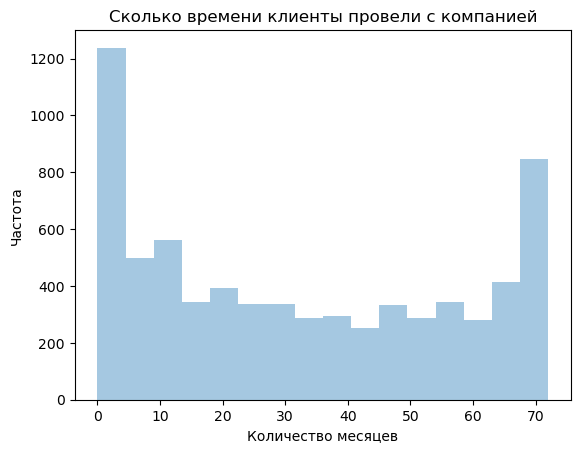

In [30]:
sns.distplot(churn['tenure'], kde = False)
plt.xlabel('Количество месяцев')
plt.ylabel('Частота')
plt.title('Сколько времени клиенты провели с компанией')

Предварительно подготовим данные:

In [31]:
churn['tenure'] = churn['tenure'] + 0.001    # чтобы не было нулевых месяцев
churn['Churn'] = np.where(churn['Churn'] == 'Yes', 1, 0)    # перекодируем в числа
churn['SeniorCitizen'] = np.where(churn['SeniorCitizen'] == 1, 'Yes', 'No')    # наоборот

Строим модель. Ей нужно указать данные, колонку со временем, колонку с событием, и опционально формулу.

In [ ]:
#surv = lf.WeibullAFTFitter()

#surv.fit(df = churn, duration_col = 'tenure', event_col = 'Churn', 
#         formula = 'C(SeniorCitizen) + C(Dependents) + MonthlyCharges + C(PaperlessBilling)')

In [ ]:
#surv.print_summary()

Если коэффициент меньше нуля - время до события короче.
Если коэффициент больше нуля - время до события дольше.

Интерпретация:
* Пожилые люди меньше времени пользуются сервисом
* Те, у кого бесчековая оплата - ещё меньше
* Люди с иждивенциами пользуются им больше обычного

* Переменная из двух категорий – биномиальная регрессия
* Категорий больше – мультиномиальная
* В категориях есть явное убывание или нарастание – порядковая
* Считаем количество чего-то – Пуассоновская
* Дисперсия больше среднего – отрицательно-биномиальная
* Слишком много нулей – zero-inflated-модель
* У нас есть какое-то событие и время до него – анализ выживаемости